In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import GoH.reports
import GoH.utilities
import GoH.clean
import GoH.normalize
import re
import os
from os import listdir
from os.path import isfile, join
import collections

In [4]:
%matplotlib inline

In [5]:
wordlist_dir = "/Users/jeriwieringa/Dissertation/drafts/data/word-lists"
wordlists = ["2016-12-07-SDA-last-names.txt", 
             "2016-12-07-SDA-place-names.txt", 
             "2016-12-08-SDA-Vocabulary.txt", 
             "2017-01-03-place-names.txt", 
             "2017-02-14-Base-Word-List-SCOWL&KJV.txt",
             "2017-02-14-Roman-Numerals.txt",
             "2017-03-01-Additional-Approved-Words.txt"
            ]

In [6]:
spelling_dictionary = GoH.utilities.create_spelling_dictionary(wordlists, wordlist_dir)

In [7]:
title = "HM"

In [8]:
base_dir = "/Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/{}/".format(title)

## Baseline

In [9]:
cycle = 'baseline'

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/HM/baseline

Average verified rate: 0.9587259719847017

Average of error rates: 0.04563713862120089

Total token count: 2312665



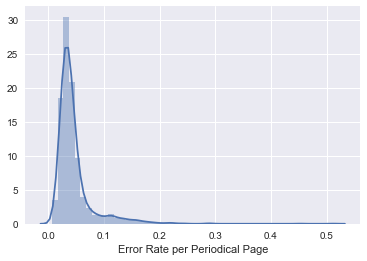

In [10]:
stats = GoH.reports.overview_report(join(base_dir, cycle), spelling_dictionary, title)

In [11]:
errors_summary = GoH.reports.get_errors_summary( stats )
GoH.reports.top_errors( errors_summary, 100 )

[('ñ', 5173),
 ("'", 2093),
 ('-', 1704),
 ('m', 1508),
 ('e', 1270),
 ('w', 1132),
 ('re-', 1063),
 ('con-', 977),
 ('pm', 964),
 ('tion', 943),
 ('t', 936),
 ('¥', 857),
 ('in-', 750),
 (')', 742),
 ('n', 699),
 ('r', 684),
 ('d', 673),
 ('f', 635),
 ('g', 621),
 ('be-', 619),
 (']', 614),
 ('de-', 476),
 ('ex-', 465),
 ('can-', 464),
 ('com-', 462),
 ('(', 446),
 ('z', 394),
 ('ment', 392),
 ('mis-', 381),
 ('<', 361),
 ('--', 334),
 ('dis-', 320),
 ('tions', 316),
 ('en-', 298),
 ('co', 295),
 ('ex', 295),
 ('first-day', 266),
 ("canvassers'", 262),
 ('pre-', 255),
 ('per-', 255),
 ('sionary', 251),
 ('im-', 246),
 ('ac-', 222),
 ('un-', 222),
 ('u', 221),
 ('ers', 201),
 ('vassers', 196),
 ('ple', 195),
 ('pro-', 192),
 ('ence', 185),
 ('th', 182),
 ('ad-', 180),
 ('mission-', 179),
 ('mt', 176),
 ('peo-', 175),
 ('ap-', 172),
 ('*', 170),
 ('sub-', 170),
 ('inter-', 165),
 ('sab-', 151),
 ('ary', 148),
 ('ments', 147),
 ('for-', 146),
 ('an-', 140),
 ('pp', 134),
 ('them-', 132),

## Review Special Characters

In [12]:
GoH.reports.tokens_with_special_characters(errors_summary)[:200]

[('ñ', 5173),
 ('¥', 857),
 (')', 742),
 (']', 614),
 ('(', 446),
 ('<', 361),
 ('*', 170),
 ('ô', 120),
 ('¡', 113),
 ('<<', 112),
 ('ñthe', 90),
 ('/', 85),
 ('(see', 79),
 ('_', 68),
 ('[study', 58),
 ('[', 57),
 ('ã', 54),
 ('%', 51),
 ('(the', 51),
 ('ñno', 47),
 ('¥¥', 45),
 ('+', 43),
 ('[the', 41),
 ('(for', 39),
 ('`', 36),
 ('(dyspeptic)', 36),
 ('[for', 35),
 ('ñthat', 33),
 ('[nov', 32),
 ('{', 31),
 ('[april', 30),
 ('[june', 29),
 ('=', 29),
 ('(ship)', 27),
 ('[dec', 27),
 ('[may', 27),
 ('(and', 27),
 ('[sept', 26),
 ('(furnished', 25),
 ('[july', 25),
 ('£', 25),
 ('ñid', 25),
 ('ñindividuals', 24),
 ('ñto', 23),
 ('[aug', 22),
 ('ñwhat', 21),
 ('(a', 20),
 ('\\', 20),
 ('[references', 19),
 ('ñi', 18),
 ('(class', 18),
 ('(which', 18),
 ('[jan', 17),
 ('(collections', 17),
 ('ññ', 16),
 ('ñthis', 16),
 ('[fourth', 16),
 ('(not', 16),
 ('the¥', 16),
 ('ñit', 16),
 ('to¥', 16),
 ('ñand', 15),
 ('[answers', 15),
 ('ñin', 15),
 ('(as', 15),
 ('ña', 14),
 ('ñnot', 14),
 ('

## Correction 1 -- Normalize Characters

In [13]:
# %load shared_elements/normalize_characters.py
prev = "baseline"
cycle = "correction1"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    # Substitute for all other dashes
    content = re.sub(r"—-—–‑", r"-", content)

    # Substitute formatted apostrophe
    content = re.sub(r"\’\’\‘\'\‛\´", r"'", content)
    
    # Replace all special characters with a space (as these tend to occur at the end of lines)
    content = re.sub(r"[^a-zA-Z0-9\s,.!?$:;\-&\'\"]", r" ", content)
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/HM/correction1

Average verified rate: 0.9648107385673316

Average of error rates: 0.03857524091919941

Total token count: 2303771



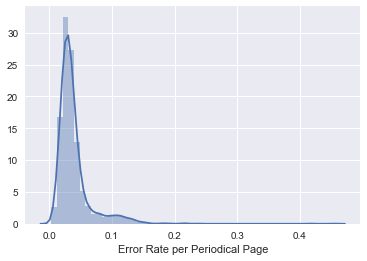

In [14]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [15]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[("'", 2165),
 ('-', 1770),
 ('m', 1518),
 ('e', 1297),
 ('w', 1148),
 ('re-', 1063),
 ('t', 984),
 ('con-', 978),
 ('pm', 967),
 ('tion', 946),
 ('in-', 751),
 ('n', 709),
 ('r', 703),
 ('d', 690),
 ('f', 648),
 ('g', 634),
 ('be-', 620),
 ('de-', 477),
 ('ex-', 465),
 ('can-', 464),
 ('com-', 463),
 ('z', 406),
 ('ment', 392),
 ('mis-', 383),
 ('--', 346),
 ('dis-', 320),
 ('tions', 316),
 ('co', 302),
 ('en-', 299),
 ('ex', 296),
 ('first-day', 266),
 ("canvassers'", 264),
 ('pre-', 257),
 ('per-', 256),
 ('sionary', 251),
 ('im-', 246),
 ('u', 226),
 ('ac-', 223),
 ('un-', 222),
 ('ers', 201),
 ('vassers', 197),
 ('ple', 195),
 ('pro-', 192),
 ('th', 186),
 ('ence', 185),
 ('ad-', 180),
 ('mission-', 179),
 ('mt', 176),
 ('peo-', 175),
 ('ap-', 172)]

## Correction 2 -- Fix Line Endings

In [16]:
# %load shared_elements/correct_line_endings.py
prev = "correction1"
cycle = "correction2"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    content = re.sub(r"(\w+)(\-\s{1,})([a-z]+)", r"\1\3", content)

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/HM/correction2

Average verified rate: 0.9837372851361125

Average of error rates: 0.02005003706449222

Total token count: 2274405



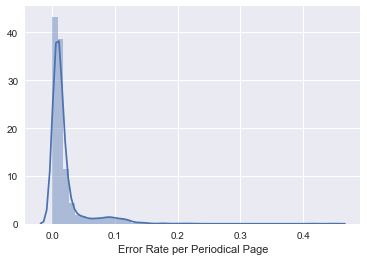

In [17]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [18]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[("'", 2165),
 ('-', 1760),
 ('m', 1517),
 ('e', 1296),
 ('w', 1148),
 ('t', 984),
 ('pm', 966),
 ('n', 708),
 ('r', 702),
 ('d', 690),
 ('f', 647),
 ('g', 634),
 ('z', 406),
 ('--', 346),
 ('co', 302),
 ('ex', 296),
 ("canvassers'", 278),
 ('first-day', 266),
 ('u', 226),
 ('th', 186),
 ('mt', 176),
 ('pp', 134),
 ('mc', 108),
 ('reading-matter', 103),
 ('wm', 96),
 ('cc', 86),
 ('ft', 86),
 ("''", 84),
 ('k', 81),
 ('q', 80),
 ('miscel', 79),
 ('x', 74),
 ('pt', 73),
 ('av', 72),
 ('mis', 71),
 ("l't'd", 70),
 ('mo', 68),
 ('qr', 64),
 ('cumb', 62),
 ('---', 58),
 ('id', 56),
 ('canof', 55),
 ('sionary', 54),
 ('-p', 53),
 ('mis-', 52),
 ("'t", 52),
 ("deliv'd", 51),
 ('raiatea', 51),
 ("'the", 50),
 ("'s", 49)]

## Correction 3 -- Remove Extra Dashes

In [19]:
# %load shared_elements/remove_extra_dashes.py
prev = "correction2"
cycle = "correction3"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    
    replacements = []
    for token in tokens:
        if token[0] is "-":
            replacements.append((token, token[1:]))
            
        elif token[-1] is "-":
            replacements.append((token, token[:-1]))
        else:
            pass
        
    if len(replacements) > 0:
#         print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/HM/correction3

Average verified rate: 0.9853017474867567

Average of error rates: 0.01809303187546331

Total token count: 2274352



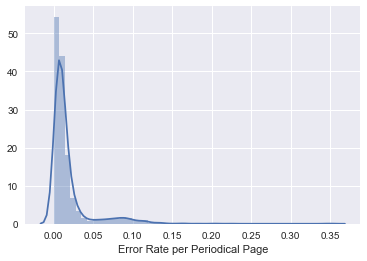

In [20]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [21]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[("'", 2185),
 ('m', 1522),
 ('e', 1307),
 ('w', 1151),
 ('t', 1006),
 ('pm', 968),
 ('n', 715),
 ('r', 715),
 ('d', 693),
 ('f', 651),
 ('g', 639),
 ('z', 406),
 ('co', 335),
 ('ex', 309),
 ("canvassers'", 278),
 ('u', 226),
 ('-', 188),
 ('th', 186),
 ('mt', 177),
 ('first-day', 162),
 ('pp', 138),
 ('mis', 122),
 ('mc', 111),
 ('wm', 96),
 ('reading-matter', 89),
 ('cc', 87),
 ("''", 86),
 ('ft', 86),
 ('k', 83),
 ('q', 80),
 ('miscel', 79),
 ('re', 79),
 ('pt', 76),
 ('x', 75),
 ('av', 72),
 ("l't'd", 70),
 ('mo', 69),
 ('qr', 65),
 ('cumb', 62),
 ('id', 56),
 ('canof', 55),
 ('sionary', 54),
 ("'t", 52),
 ("deliv'd", 51),
 ('raiatea', 51),
 ("'the", 50),
 ("'s", 49),
 ('ga', 49),
 ('ti', 44),
 ('aro', 43)]

## Correction 4 -- Remove extra quotation marks

In [22]:
# %load shared_elements/replace_extra_quotation_marks.py
prev = "correction3"
cycle = "correction4"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    
    corrections = []
    for token in tokens:
        token_list = list(token)
        last_char = token_list[-1]

        if last_char is "'":
            if len(token) > 1:
                if token_list[-2] is 's' or 'S':
                    pass
                else:
                    corrections.append((token, re.sub(r"'", r"", token)))
            else:
                pass
        elif token[0] is "'":
            corrections.append((token, re.sub(r"'", r"", token)))   
        else:
            pass
    
    if len(corrections) > 0:
#         print('{}: {}'.format(filename, corrections))

        for correction in corrections:
            content = GoH.clean.replace_pair(correction, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/HM/correction4

Average verified rate: 0.98580696505163

Average of error rates: 0.017521497405485545

Total token count: 2274355



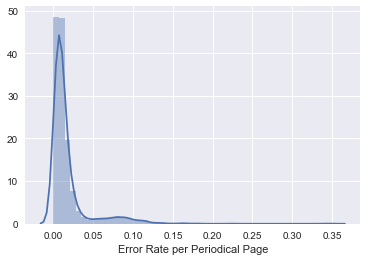

In [23]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [24]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[("'", 2043),
 ('m', 1538),
 ('e', 1312),
 ('w', 1151),
 ('t', 1068),
 ('pm', 968),
 ('n', 743),
 ('r', 727),
 ('d', 714),
 ('f', 651),
 ('g', 641),
 ('z', 411),
 ('co', 335),
 ('ex', 309),
 ("canvassers'", 277),
 ('u', 228),
 ('-', 188),
 ('th', 186),
 ('mt', 177),
 ('first-day', 162),
 ('pp', 138),
 ('mis', 122),
 ('mc', 111),
 ('wm', 97),
 ('reading-matter', 89),
 ('cc', 87),
 ('ft', 86),
 ('re', 85),
 ('k', 84),
 ("''", 84),
 ('q', 81),
 ('miscel', 79),
 ('pt', 76),
 ('x', 75),
 ('av', 72),
 ('mo', 69),
 ('qr', 65),
 ('cumb', 62),
 ('id', 56),
 ('canof', 55),
 ('sionary', 54),
 ('raiatea', 51),
 ("deliv'd", 50),
 ('ga', 49),
 ("l't'd", 48),
 ('ti', 46),
 ('aro', 43),
 ('ci', 43),
 ('seventhday', 43),
 ('intyre', 41)]

## Correction 5 -- Rejoin Burst Words

In [25]:
# %load shared_elements/rejoin_burst_words.py
prev = "correction4"
cycle = "correction5"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    pattern = re.compile("(\s(\w{1,2}\s){5,})")
    
    replacements = []
    GoH.clean.check_splits(pattern, spelling_dictionary, content, replacements)
    
    if len(replacements) > 0:
#         print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

## Check Correction 5

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/HM/correction5

Average verified rate: 0.9857966436744413

Average of error rates: 0.017540029651593778

Total token count: 2274392



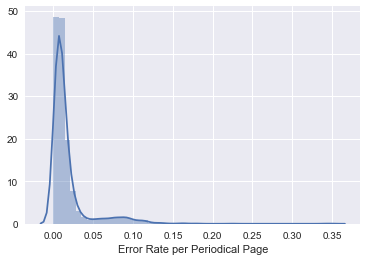

In [26]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [27]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[("'", 2043),
 ('m', 1538),
 ('e', 1308),
 ('w', 1150),
 ('t', 1067),
 ('pm', 968),
 ('n', 742),
 ('r', 725),
 ('d', 712),
 ('f', 650),
 ('g', 641),
 ('z', 411),
 ('co', 335),
 ('ex', 309),
 ("canvassers'", 277),
 ('u', 228),
 ('-', 188),
 ('th', 186),
 ('mt', 177),
 ('first-day', 162),
 ('pp', 138),
 ('mis', 122),
 ('mc', 111),
 ('wm', 97),
 ('reading-matter', 89),
 ('cc', 87),
 ('ft', 86),
 ('k', 85),
 ('re', 85),
 ("''", 84),
 ('q', 81),
 ('miscel', 79),
 ('pt', 76),
 ('x', 75),
 ('av', 72),
 ('mo', 69),
 ('qr', 65),
 ('cumb', 62),
 ('id', 56),
 ('canof', 55),
 ('sionary', 54),
 ('raiatea', 51),
 ("deliv'd", 50),
 ('ga', 49),
 ("l't'd", 48),
 ('ti', 46),
 ('aro', 43),
 ('ci', 43),
 ('seventhday', 43),
 ('intyre', 41)]

## Correction 6 -- Rejoin Split Words

In [28]:
# %load shared_elements/rejoin_split_words.py
prev = "correction5"
cycle = "correction6"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    errors = GoH.reports.identify_errors(tokens, spelling_dictionary)

    replacements = GoH.clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=False)
    
    if len(replacements) > 0:
#         print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/HM/correction6

Average verified rate: 0.9860850368630866

Average of error rates: 0.017219792438843588

Total token count: 2273955



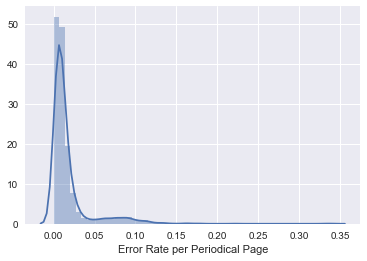

In [29]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [30]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[("'", 2043),
 ('m', 1541),
 ('e', 1301),
 ('w', 1150),
 ('t', 1060),
 ('pm', 968),
 ('n', 740),
 ('r', 724),
 ('d', 708),
 ('f', 650),
 ('g', 639),
 ('z', 411),
 ('ex', 304),
 ('co', 282),
 ("canvassers'", 277),
 ('u', 228),
 ('-', 188),
 ('th', 179),
 ('mt', 177),
 ('first-day', 162),
 ('pp', 138),
 ('wm', 97),
 ('reading-matter', 89),
 ('cc', 87),
 ('ft', 86),
 ("''", 84),
 ('k', 82),
 ('q', 81),
 ('miscel', 79),
 ('pt', 76),
 ('x', 75),
 ('mis', 72),
 ('av', 72),
 ('mo', 69),
 ('qr', 65),
 ('cumb', 62),
 ('re', 57),
 ('id', 56),
 ('canof', 55),
 ('raiatea', 51),
 ("deliv'd", 50),
 ('ga', 48),
 ("l't'd", 48),
 ('ti', 45),
 ('aro', 43),
 ('ci', 43),
 ('seventhday', 43),
 ('revassers', 39),
 ("of'", 39),
 ('scand', 38)]

## Correction 7 -- Rejoin Split Words II

In [31]:
# %load shared_elements/rejoin_split_words.py
prev = "correction6"
cycle = "correction7"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    errors = GoH.reports.identify_errors(tokens, spelling_dictionary)

    replacements = GoH.clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=True)
    
    if len(replacements) > 0:
#         print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/HM/correction7

Average verified rate: 0.9862065992991147

Average of error rates: 0.017081541882876205

Total token count: 2273696



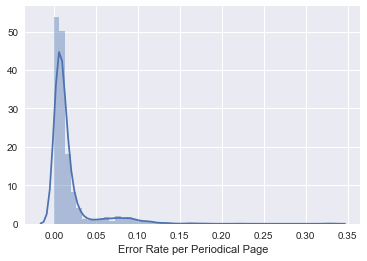

In [32]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [33]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[("'", 2042),
 ('m', 1539),
 ('e', 1301),
 ('w', 1143),
 ('t', 1056),
 ('pm', 966),
 ('n', 735),
 ('r', 722),
 ('d', 706),
 ('f', 649),
 ('g', 633),
 ('z', 411),
 ('ex', 303),
 ("canvassers'", 277),
 ('co', 267),
 ('u', 228),
 ('-', 188),
 ('mt', 177),
 ('th', 175),
 ('first-day', 162),
 ('pp', 138),
 ('wm', 97),
 ('reading-matter', 89),
 ('cc', 87),
 ('ft', 86),
 ("''", 84),
 ('k', 81),
 ('q', 81),
 ('miscel', 79),
 ('pt', 76),
 ('x', 75),
 ('mis', 72),
 ('av', 72),
 ('mo', 68),
 ('qr', 65),
 ('cumb', 62),
 ('re', 57),
 ('id', 56),
 ('canof', 55),
 ('raiatea', 51),
 ("deliv'd", 50),
 ('ga', 48),
 ("l't'd", 48),
 ('ti', 45),
 ('aro', 43),
 ('seventhday', 43),
 ('ci', 43),
 ('revassers', 39),
 ("of'", 39),
 ("dist's", 38)]

## Review Remaining Errors

In [34]:
# %load shared_elements/high_error_rates.py
GoH.reports.docs_with_high_error_rate(summary)

doc_keys = [x[0] for x in GoH.reports.docs_with_high_error_rate(summary) if x[1] > 0.2]

# GoH.utilities.open_original_docs(doc_keys, directories['cycle'])

Opened files: 

HM18970901-V09-08-page16.txt

HM18971201-V09-11-page16.txt

HM18910301-V03-03e2-page2.txt



In [35]:
GoH.reports.long_errors(errors_summary, min_length=15)[100:]

(['commandment-keeping',
  'numbeueriodicals',
  "neighbor'sfireside",
  'medicaltinissionary',
  'notforgeneraluse',
  "prerogatives'and",
  'church-fellowship',
  'fourteen-million',
  'iemmemmommommommminmemmimmomme',
  'communicaterithemselves',
  'americanisentinel',
  'nemommommmommomem',
  'religious-liberty',
  'fellow-passengers',
  'drawbridge-castle',
  'self-examination',
  'thirst-producing',
  'sabbbath-keeping',
  'protestantrollege',
  'handwriting--fine',
  'commander-in-chief',
  'lelvfeffieflvleffvflovio',
  'developeradicate',
  'mommonommemmmumemomminommun',
  'self-renunciation',
  'scandinavian-american',
  'othresubscription',
  'elberfeld-barmen',
  'self-sufficiency',
  'tubercucomparatively',
  'red-white-and-blue',
  'hard-beartedness',
  'mmemmiiimmommommmem',
  'lattice-enclosed',
  'first-day-keeper',
  'fellow-sufferers',
  'commandmentkeepers',
  'occasion-required',
  'brain-enervating',
  'tractsandpamphletssentout',
  'thiscertifiesthatthebattlecreek

## Correction 8 -- Remove long error tokens

In [37]:
# %load shared_elements/remove-tokens-with-long-strings-of-characters.py
prev = cycle
cycle = "correction8"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    
    replacements = []
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "m|M"))
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "i|I"))
    
    replacements = [item for sublist in replacements for item in sublist]
            
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    else:
        pass
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

HM18900601-V02-06-page4.txt: [('UMMEMMOMMOMMONNOMMOMMOROMMEMM', ' '), ('IEMMEMMOMMOMMOMMMINMEMMIMMOMME', ' '), ('MMINIMMOMMOMMIMMOMMINIMMOMMOMMOM', ' '), ('MOMMOMMIIMMENIMMOOMMMEMMINMENOMMM', ' '), ('MMEMMEMMEMMOMMEMOMMMEMMIUMMIIMM', ' '), ('IMINMEMEMOMMUNIMNIMOMMINIUMMOM', ' '), ('NEMOMMOMMMOMMOMEM', ' '), ('ommisommummin', ' '), ('IIIMMUMMOMMUMM', ' '), ('MOMMONOMMEMMMUMEMOMMINOMMUN', ' '), ('MMEMEMOINNEMMOMMOMMOMMUMMOMMIIMM', ' '), ('MMOMMIUMEMMEMIUMMIMMMEMMOMEMMO', ' '), ('MMEMMIIIMMOMMOMMMEM', ' '), ('IIIIMMIIIMMEMEMNIUMMEM', ' '), ('INNIMMINNIIIIIIIIIIMEIN', ' '), ('IIIIIIIIIIIIIIIIIIIIIIIKUM', ' ')]


## Correction 9 -- Separate Squashed Words

In [39]:
# %load shared_elements/separate_squashed_words.py
import pandas as pd
from math import log

prev = cycle
cycle = "correction9"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

verified_tokens = []

for filename in corpus:  
    content = GoH.utilities.readfile(directories['prev'], filename)
    GoH.normalize.get_approved_tokens(content, spelling_dictionary, verified_tokens)

tokens_with_freq = dict(collections.Counter(verified_tokens))
words = pd.DataFrame(list(tokens_with_freq.items()), columns=['token','freq'])
words_sorted = words.sort_values('freq', ascending=False)
words_sorted_short = words_sorted[words_sorted.freq > 2]

sorted_list_of_words = list(words_sorted_short['token'])

wordcost = dict((k, log((i+1)*log(len(sorted_list_of_words)))) for i,k in enumerate(sorted_list_of_words))
maxword = max(len(x) for x in sorted_list_of_words)

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    text = GoH.utilities.strip_punct(content)
    tokens = GoH.utilities.tokenize_text(text)
    
    replacements = []
    
    for token in tokens:
        if not token.lower() in spelling_dictionary:
            if len(token) > 17:
                if re.search(r"[\-\-\'\"]", token):
                    pass
                else:
                    split_string = GoH.normalize.infer_spaces(token, wordcost, maxword)
                    list_split_string = split_string.split()
                    
                    if GoH.normalize.verify_split_string(list_split_string, spelling_dictionary):
                        replacements.append((token, split_string))
                    else:
                        pass
            else:
                pass
        else:
            pass
        
    if len(replacements) > 0:
        print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

HM18891101-V01-11e-page6.txt: [('peopleintothetruththanany', 'people into the truth than any')]
HM18900201-V02-02-page5.txt: [('Thiscorrespondence', 'This correspondence')]
HM18920401-V04-04-page6.txt: [('tractsandpamphletssentout', 'tracts and pamphlets sent out')]
HM18920501-V04-05-page19.txt: [('differentlanguages', 'different languages')]
HM18930801-V05-07e-page7.txt: [('commandmentkeepers', 'commandment keepers')]
HM18940101-V06-01-page15.txt: [('confidentthatquiteanumberofhisneighborswill', 'confident that quite a number of his neighbors will')]
HM18940701-V06-07e-page2.txt: [('WesleyanUniversityarenowinforeignmissionservice', 'Wesleyan University are now in foreign mission service')]
HM18950401-V07-03-page8.txt: [('allbusinessissuspendedhereforafeW', 'all business is suspended here for a f e W')]
HM18960301-V08-03-page27.txt: [('ThiscertifiesthattheBattleCreekSanitariumHealthFoods', 'This certifies that the Battle Creek Sanitarium Health Foods')]
HM18960901-V08-09-page10.txt: [(

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/HM/correction9

Average verified rate: 0.9862182950637695

Average of error rates: 0.017067457375833952

Total token count: 2273739



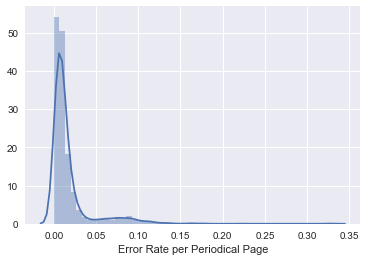

In [42]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [43]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[("'", 2042),
 ('m', 1539),
 ('e', 1302),
 ('w', 1144),
 ('t', 1056),
 ('pm', 966),
 ('n', 735),
 ('r', 722),
 ('d', 706),
 ('f', 650),
 ('g', 633),
 ('z', 411),
 ('ex', 303),
 ("canvassers'", 277),
 ('co', 267),
 ('u', 228),
 ('-', 188),
 ('mt', 177),
 ('th', 175),
 ('first-day', 162),
 ('pp', 138),
 ('wm', 97),
 ('reading-matter', 89),
 ('cc', 87),
 ('ft', 86),
 ("''", 84),
 ('k', 81),
 ('q', 81),
 ('miscel', 79),
 ('pt', 76),
 ('x', 75),
 ('mis', 72),
 ('av', 72),
 ('mo', 68),
 ('qr', 65),
 ('cumb', 62),
 ('re', 57),
 ('id', 56),
 ('canof', 55),
 ('raiatea', 51),
 ("deliv'd", 50),
 ('ga', 48),
 ("l't'd", 48),
 ('ti', 45),
 ('aro', 43),
 ('seventhday', 43),
 ('ci', 43),
 ('revassers', 39),
 ("of'", 39),
 ("dist's", 38)]